In [ ]:
# 1. Загрузить набор данных из репозитория. Свой выбор данных  согласовать с преподавателем.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv("./data/global_cancer_patients_2015_2024.csv")

print(df.info())

df = df.drop_duplicates()

df = df.drop("Patient_ID", axis=1)
df = df.drop("Treatment_Cost_USD", axis=1)
df = df.drop("Year", axis=1)

df.head()


# 5. Отобрать и определить признаки, которые будут использоваться для построения моделей.

important_feat = [
    "Age",
    "Gender",
    "Country_Region",
    "Genetic_Risk",
    "Air_Pollution",
    "Alcohol_Use",
    "Smoking",
    "Obesity_Level",
    "Cancer_Type" "Cancer_Stage",
]

numeric_columns = [
    "Age",
    "Genetic_Risk",
    "Air_Pollution",
    "Alcohol_Use",
    "Smoking",
    "Obesity_Level",
    "Survival_Years",
    "Target_Severity_Score",
]


categorical_columns = [
    "Gender",
    "Country_Region",
    "Cancer_Type",
    "Cancer_Stage",
]

target = "Cancer_type"
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

,Age,Gender,Country_Region,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score
0,71,Male,UK,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,5.9,4.92
1,34,Male,China,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,4.7,4.65
2,80,Male,Pakistan,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,7.1,5.84
3,40,Male,UK,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,1.6,3.12
4,43,Female,Brazil,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,2.9,3.62


In [ ]:
df_encoded = df.copy()

for col in categorical_columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

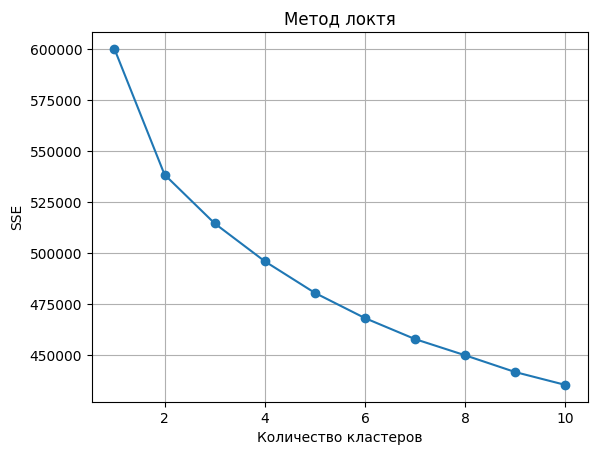

In [ ]:
df_encoded.head()

# Метод локтя
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker="o")
plt.xlabel("Количество кластеров")
plt.ylabel("SSE")
plt.title("Метод локтя")
plt.grid(True)
plt.show()

# k=4
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
# Дендрограмма
linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Дендрограмма")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")
plt.show()

In [ ]:
# 4 кластера
agglo = AgglomerativeClustering(n_clusters=4, linkage="ward")

labels_agglo = agglo.fit_predict(X_scaled)

In [7]:
# Простой подбор параметров eps и min_samples
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

In [8]:
def evaluate_clustering(X, labels):
    if len(set(labels)) > 1 and -1 not in labels:
        silhouette = silhouette_score(X, labels)
        db_index = davies_bouldin_score(X, labels)
        print(
            f"Silhouette Score: {silhouette:.3f}, Davies-Bouldin Index: {db_index:.3f}"
        )
    else:
        print("Недостаточно кластеров для оценки или есть выбросы.")


print("KMeans++:")
evaluate_clustering(X_scaled, labels_kmeans)

print("Agglomerative:")
evaluate_clustering(X_scaled, labels_agglo)

print("DBSCAN:")
evaluate_clustering(X_scaled, labels_dbscan)

KMeans++:
Silhouette Score: 0.070, Davies-Bouldin Index: 3.138
Agglomerative:
Silhouette Score: 0.027, Davies-Bouldin Index: 4.499
DBSCAN:
Недостаточно кластеров для оценки или есть выбросы.


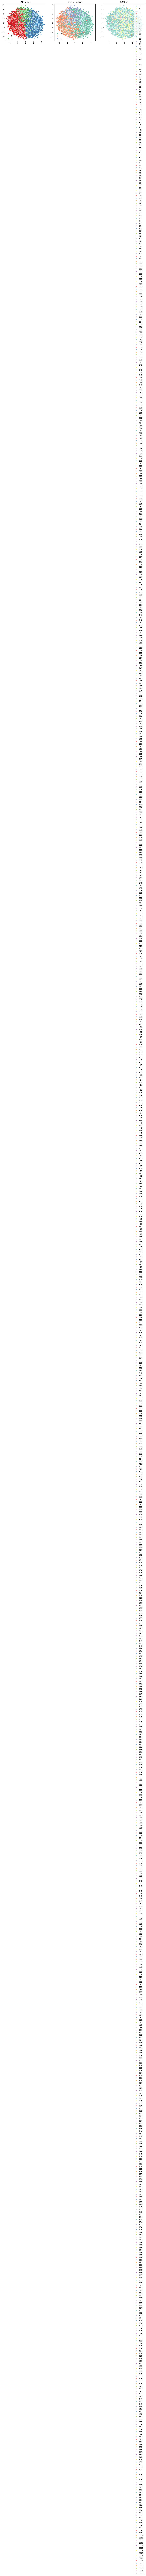

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette="Set1")
plt.title("KMeans++")

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_agglo, palette="Set2")
plt.title("Agglomerative")

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette="Set3")
plt.title("DBSCAN")

plt.show()